In [38]:
import pandas as pd
import seaborn as sns
import re

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

In [39]:
df = pd.read_csv('2022.csv')

df

,index,year,day,route,sms
0,0,2022,0,N,"[41] Pavel Hnyk (111.89 km, 22:04:56): P8M7E9 ..."
1,1,2022,0,N,"[173] Tomáš Fabián (94.41 km, 19:57:34): P9M9E..."
2,2,2022,0,N,"[73] Jan Lesák (88.35 km, 21:04:11): P7M7E7 Ko..."
3,3,2022,0,N,"[90] Michael Kazimiers (86.23 km, 19:43:37): P..."
4,4,2022,0,N,"[131] Josef Magera (86.18 km, 19:54:28): P7M7E10"
...,...,...,...,...,...
3422,3422,2022,20,S,"[606] Ivo Pohořelský (1484.06 km, 20:16:46): p..."
3423,3423,2022,20,S,"[532] Radek Hrubý (1400.65 km, 20:42:38): P6M8E8"
3424,3424,2022,20,S,"[623] Vitaliy Ostrouchov (1400.65 km, 21:39:01..."
3425,3425,2022,20,S,"[634] Jan Nový (1266.07 km, 19:16:52): P8E8M9 ..."


In [40]:
# parse SMS
# pattern = '^\[(\d+)\]\s+(\w+)\s+(\w+)\s+\(([\d.]+)\D+([\d:]+)\):(.?)'
# df[['number','name','surname','distance','time','text']] = df['sms'].str.extract(pattern)

pattern = '^\[(\d+)\]\s+([^(]+)\(([\d.]+)\D+([\d:]+)\):(.*)'
df[['number','name','distance','time','text']] = df['sms'].str.extract(pattern)

# df.drop('sms', axis=1, inplace=True)
df['number'] = df['number'].astype(int)
df['distance'] = df['distance'].astype(float)
#df['time'] = df['time'].astype(datetime) TODO


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3427 entries, 0 to 3426
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     3427 non-null   int64  
 1   year      3427 non-null   int64  
 2   day       3427 non-null   int64  
 3   route     3427 non-null   object 
 4   sms       3427 non-null   object 
 5   number    3427 non-null   int32  
 6   name      3427 non-null   object 
 7   distance  3427 non-null   float64
 8   time      3427 non-null   object 
 9   text      3427 non-null   object 
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 187.5+ KB


In [42]:
# 509 - Jiří Boček
# 517 - Přemysl Boček
# 612 - Alexandr Kosina
# 603 - David Prudký
# 173 - Tomas Fabian (vytez)

df2 = df[df['number'].isin([509,517,612,603,173])]
df2


,index,year,day,route,sms,number,name,distance,time,text
1,1,2022,0,N,"[173] Tomáš Fabián (94.41 km, 19:57:34): P9M9E...",173,Tomáš Fabián,94.41,19:57:34,"P9M9E9 Teplo a prach, jinak dnes svizna etapa..."
127,127,2022,1,N,"[173] Tomáš Fabián (339.66 km, 18:08:30): P8M9...",173,Tomáš Fabián,339.66,18:08:30,P8M9E8 Dnes krasa a jelo se vyborne. Jen me r...
399,399,2022,1,S,"[509] Jiří Boček (160.78 km, 18:31:09): 289 P8...",509,Jiří Boček,160.78,18:31:09,289 P8M8E9X8 Včera po startu mě nedělala nav....
401,401,2022,1,S,"[517] Přemysl Boček (160.78 km, 18:30:24): P8M...",517,Přemysl Boček,160.78,18:30:24,P8M9E9X9 Zdravím rodinku
404,404,2022,1,S,"[603] David Prudký (160.78 km, 19:22:56): P9M9...",603,David Prudký,160.78,19:22:56,P9M9E9X9. Zdravím Manzelku decka a vlastně ce...
...,...,...,...,...,...,...,...,...,...,...
3352,3352,2022,16,S,"[612] Alexandr Kosina (1089.44 km, 19:14:32): ...",612,Alexandr Kosina,1089.44,19:14:32,P9M9E9 nevím co napsat
3368,3368,2022,17,S,"[612] Alexandr Kosina (1388.93 km, 18:14:59): ...",612,Alexandr Kosina,1388.93,18:14:59,P8 M8E8 jede to pomalu
3385,3385,2022,18,S,"[612] Alexandr Kosina (1486.01 km, 19:59:55): ...",612,Alexandr Kosina,1486.01,19:59:55,P9M9E9 ještě chvíli pojedu
3406,3406,2022,19,S,"[612] Alexandr Kosina (1568.80 km, 19:58:56): ...",612,Alexandr Kosina,1568.80,19:58:56,P9M9E9 to už asi nevzdám


<AxesSubplot:xlabel='day', ylabel='distance'>

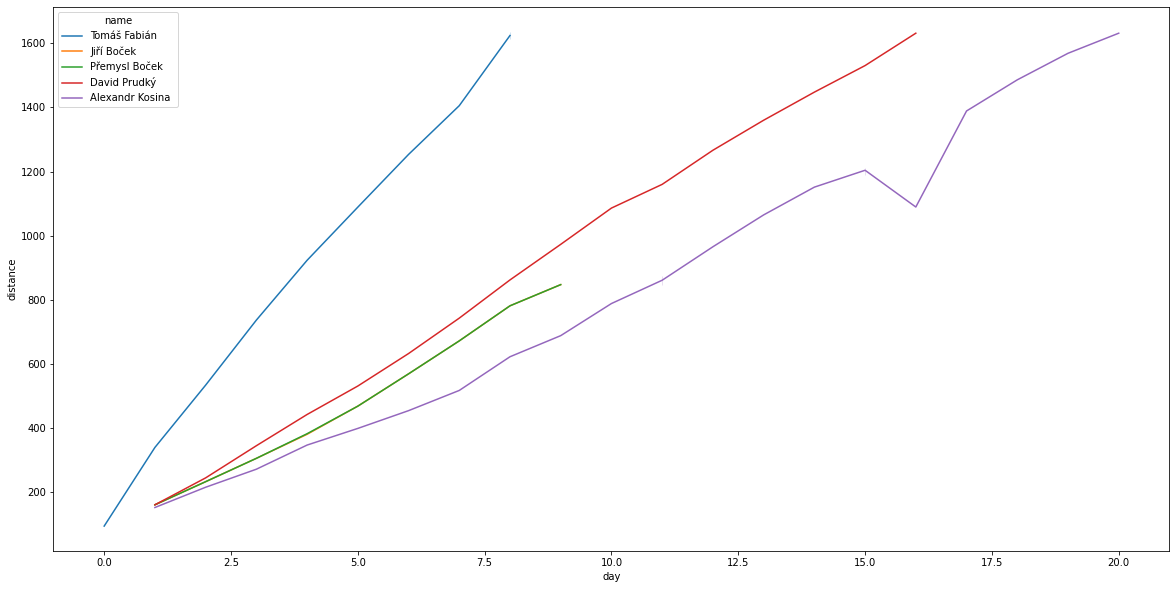

In [43]:
sns.lineplot(data=df2,x='day', y='distance',hue='name')

In [44]:
# let's find km per day
df2['distance_diff'] = df2['distance']
for num in df2['number'].unique():
    #print(num)
    df_tmp = df2.query('number == @num').copy()
    df_tmp['distance_diff'] = df_tmp['distance'].diff()
    #display(df_tmp)
    df2.loc[df2['number'] == num,'distance_diff'] = df_tmp['distance'].diff()

C:\Users\URPRUJ\AppData\Local\Temp/ipykernel_17600/2696951643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['distance_diff'] = df2['distance']
c:\Users\URPRUJ\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<AxesSubplot:xlabel='day', ylabel='distance_diff'>

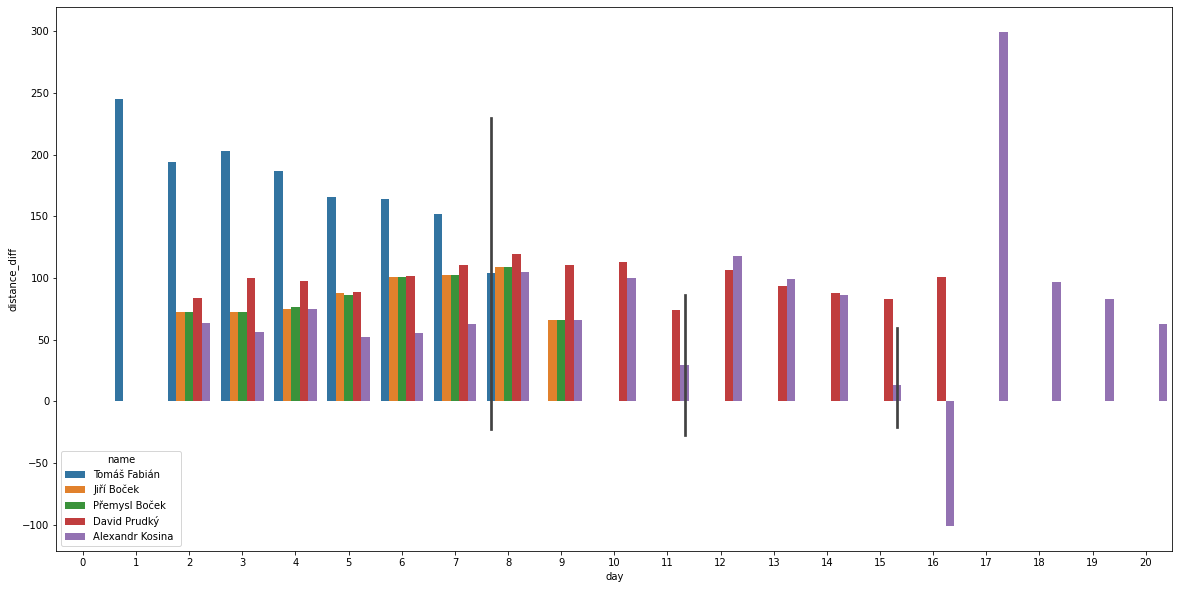

In [45]:
sns.barplot(data=df2,x='day',y='distance_diff',hue='name')